In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [5]:
# Константы
H = 6.626_070_15e34
C = 299_792_458

In [11]:
def calculate_irradiance(wave_len, r):
    energy = (H * C /wave_len) * 1e-9
    flux = energy / r**2
    return flux / (np.pi * r**2)

def lambertian_brdf(theta_i, theta_o, albedo):
    cosine_term = np.cos(theta_i) * np.cos(theta_o) / (np.sin(theta_i + theta_o) * np.pi)
    return albedo if cosine_term > 0 else 0

def calculate_reflected_irradiance(wave_len, r, albedo):
    irradiance = calculate_irradiance(wave_len, r)
    brdf = lambertian_brdf(theta_i=0, theta_o=np.arccos(np.sqrt((r**2 - wave_len**2)/(r**2 + wave_len**2))), albedo=albedo)
    return irradiance * brdf

r = []
wave_lens = []
w = 370 / (10 ** 9)

while w < (730 / 10 ** 9):
    wave_lens.append(w)
    w += 10 / 10**9

for len in wave_lens:
    r.append(calculate_reflected_irradiance(len, 2, 0.5))

     

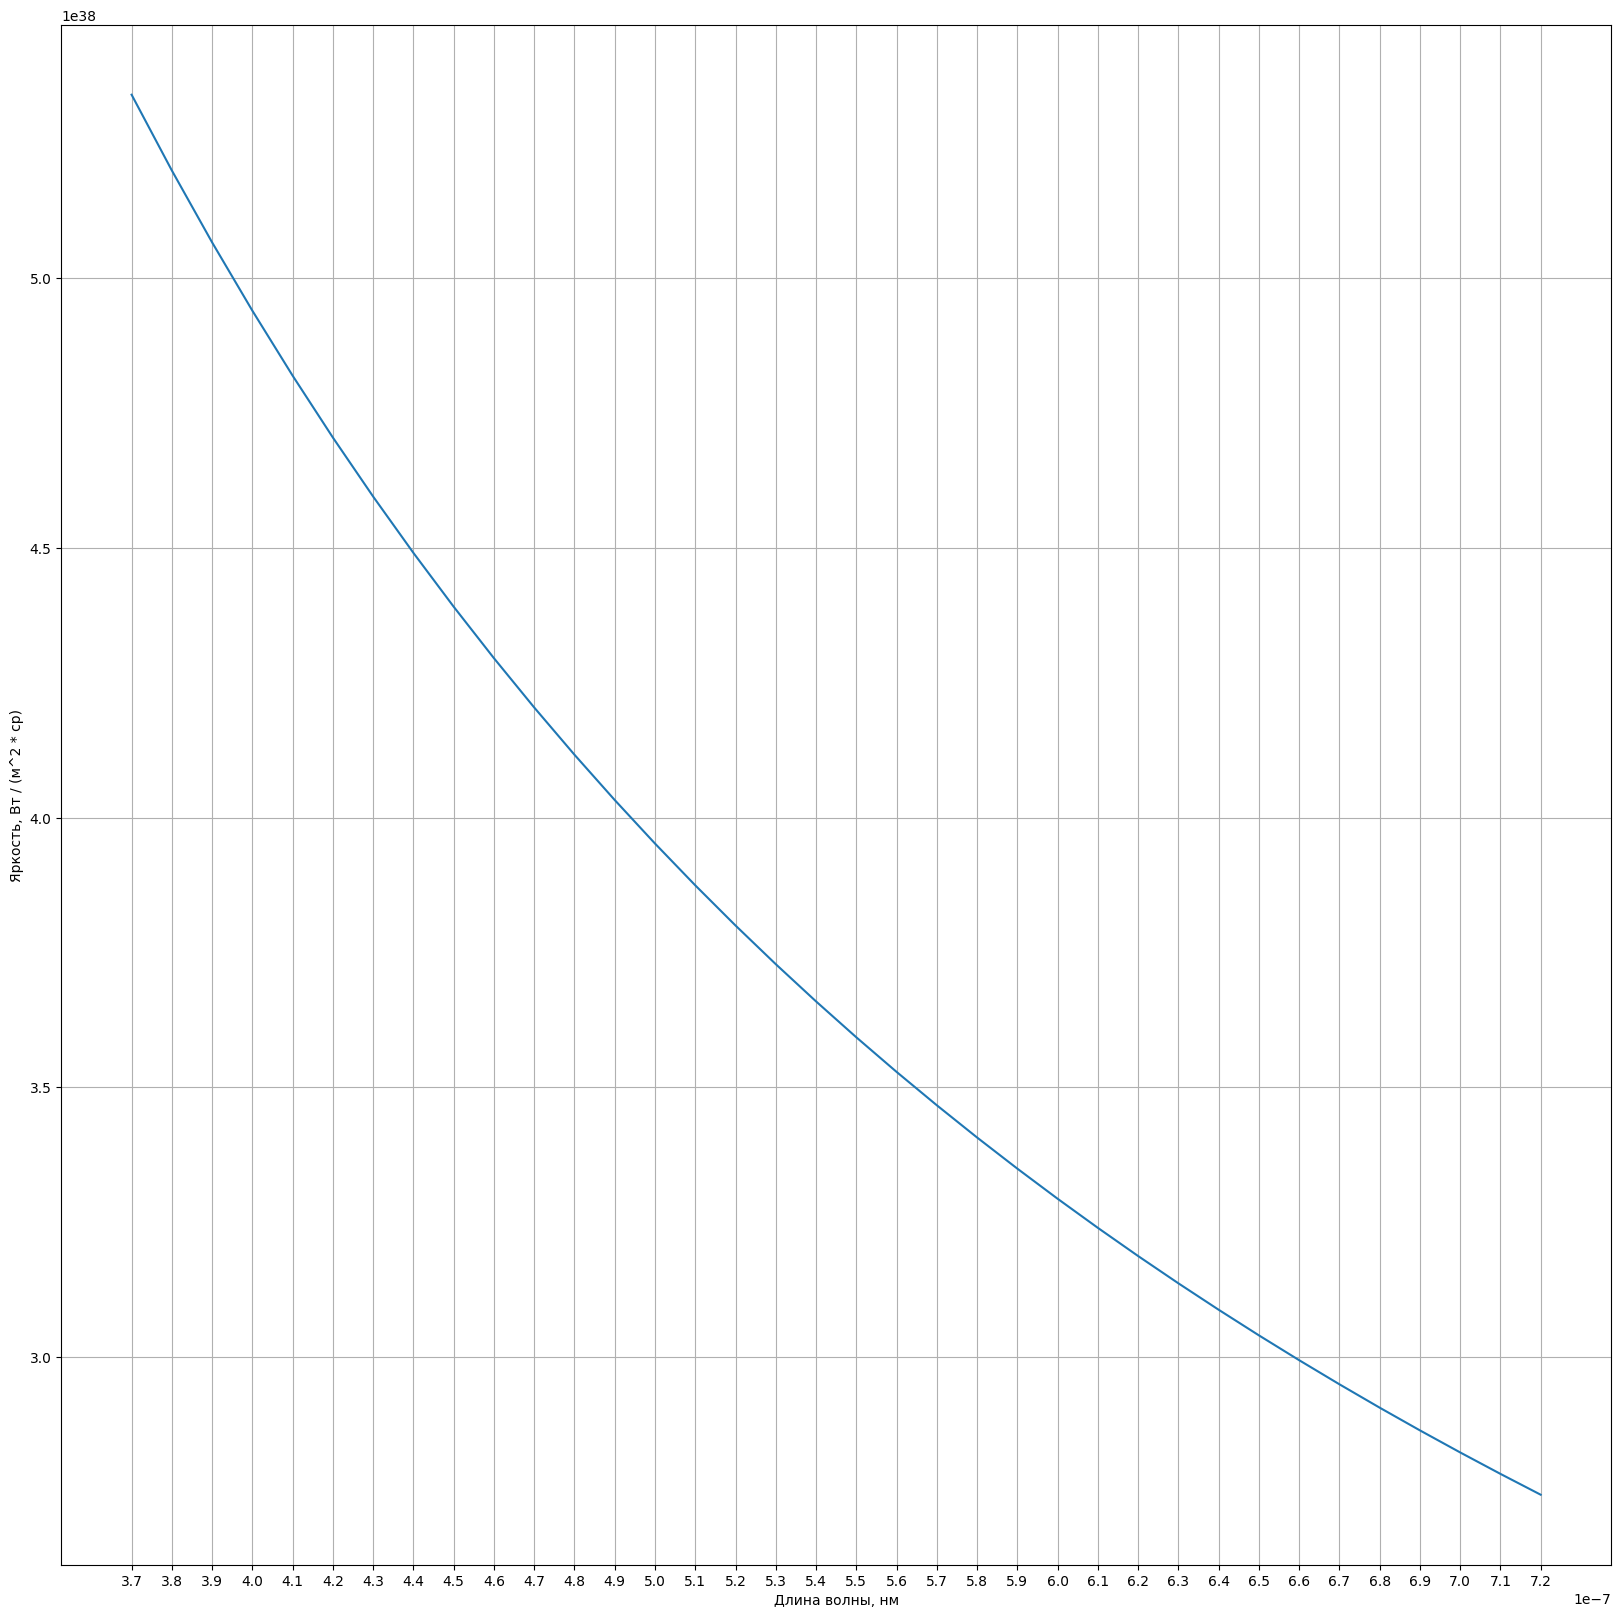

In [ ]:
plt.plot(wave_lens, r)
plt.xlabel("Длина волны, нм")
plt.ylabel("Яркость, Вт / (м^2 * ср)")
plt.xticks(wave_lens)
plt.grid(True)